In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
bank=pd.read_csv("bank_marketing_part1_Data.csv")

In [3]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
# Are there any duplicates ?
dups = bank.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
bank[dups]

Number of duplicate rows = 0


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping


In [6]:
bank.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [8]:
bank.shape

(210, 7)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

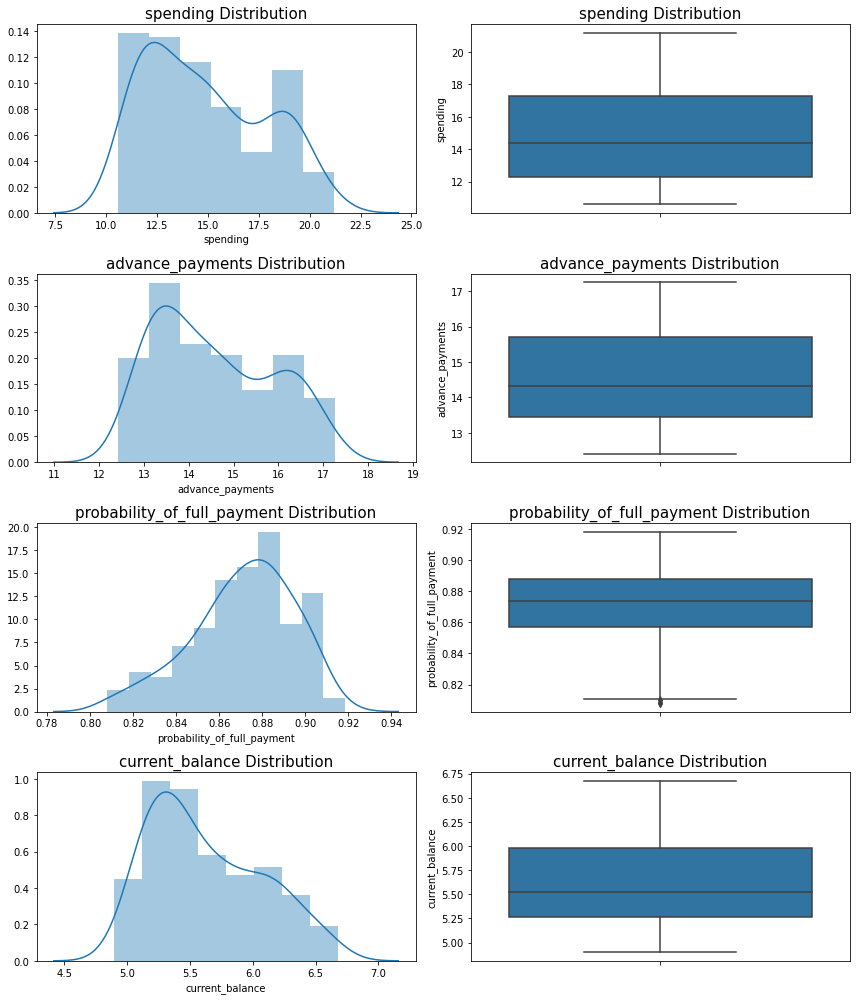

In [10]:
## Univariate analysis
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(bank['spending'] , ax=axes[0][0])
a.set_title("spending Distribution",fontsize=15)
a = sns.boxplot(bank['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spending Distribution",fontsize=15)

a = sns.distplot(bank['advance_payments'] , ax=axes[1][0])
a.set_title("advance_payments Distribution",fontsize=15)
a = sns.boxplot(bank['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments Distribution",fontsize=15)

a = sns.distplot(bank['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("probability_of_full_payment Distribution",fontsize=15)
a = sns.boxplot(bank['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment Distribution",fontsize=15)


a = sns.distplot(bank['current_balance'] , ax=axes[3][0])
a.set_title("current_balance Distribution",fontsize=15)
a = sns.boxplot(bank['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance Distribution",fontsize=15)

plt.tight_layout()
plt.show()

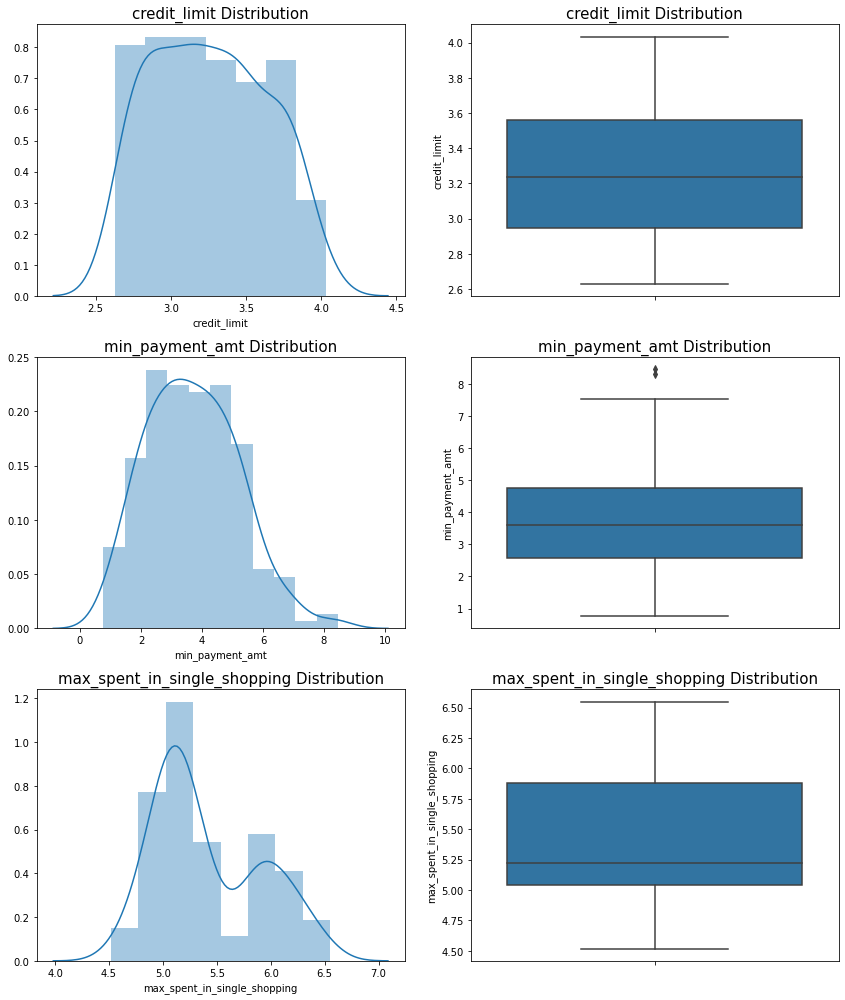

In [11]:
## Univariate analysis
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 14)

a = sns.distplot(bank['credit_limit'] , ax=axes[0][0])
a.set_title("credit_limit Distribution",fontsize=15)
a = sns.boxplot(bank['credit_limit'] , orient = "v" , ax=axes[0][1])
a.set_title("credit_limit Distribution",fontsize=15)

a = sns.distplot(bank['min_payment_amt'] , ax=axes[1][0])
a.set_title("min_payment_amt Distribution",fontsize=15)
a = sns.boxplot(bank['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("min_payment_amt Distribution",fontsize=15)

a = sns.distplot(bank['max_spent_in_single_shopping'] , ax=axes[2][0])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)
a = sns.boxplot(bank['max_spent_in_single_shopping'] , orient = "v" , ax=axes[2][1])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=15)


plt.tight_layout()
plt.show()

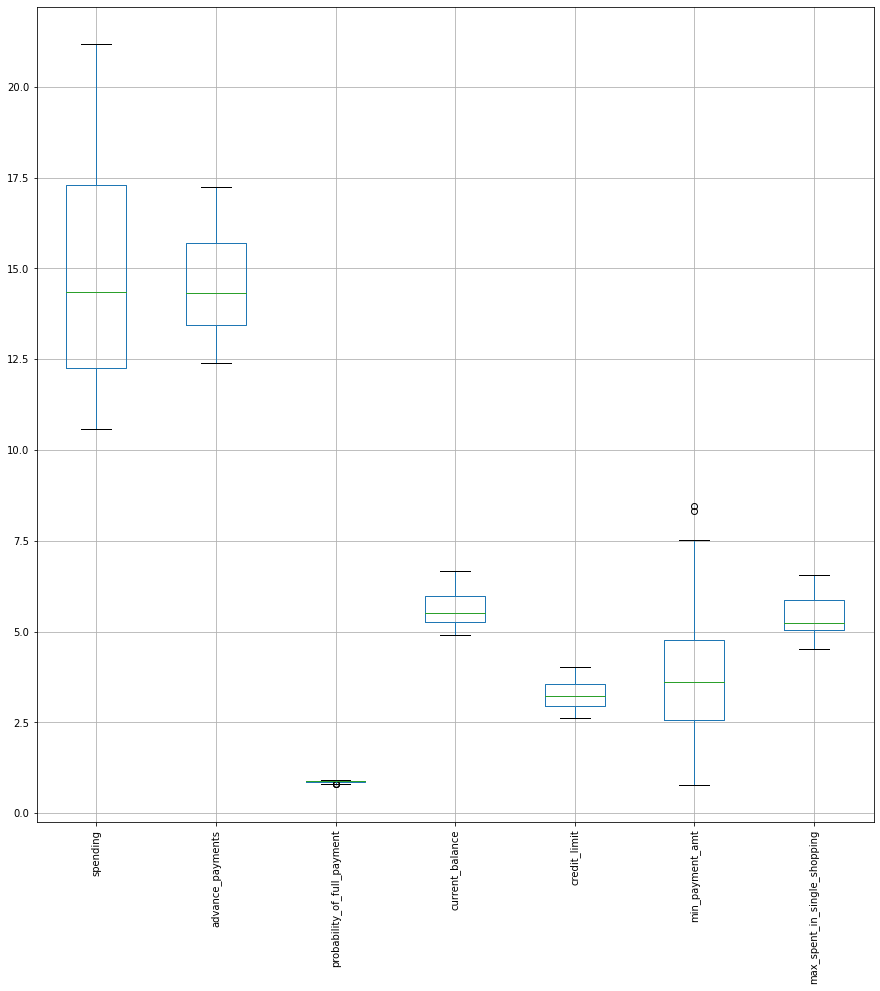

In [12]:
## Checking for outliers

bank.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

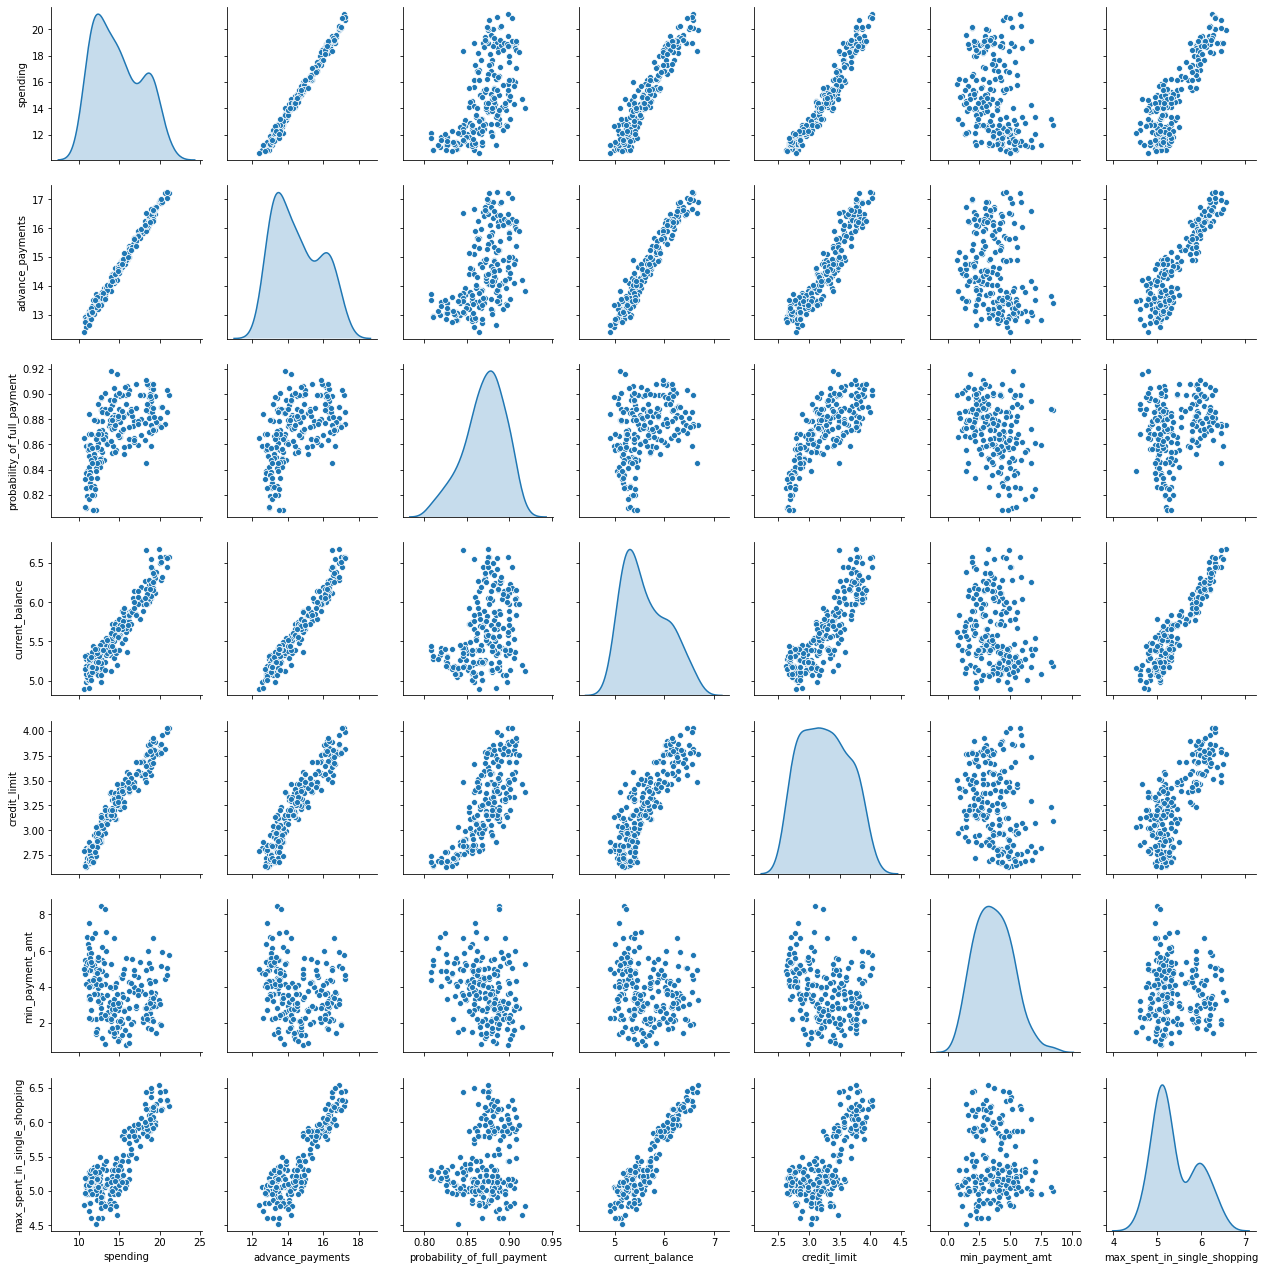

In [13]:
## Pairwise plots (Bivariate)

sns.pairplot(bank,diag_kind='kde')
plt.show()

In [14]:
# Check for correlation of variable
bank.corr(method='pearson')

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


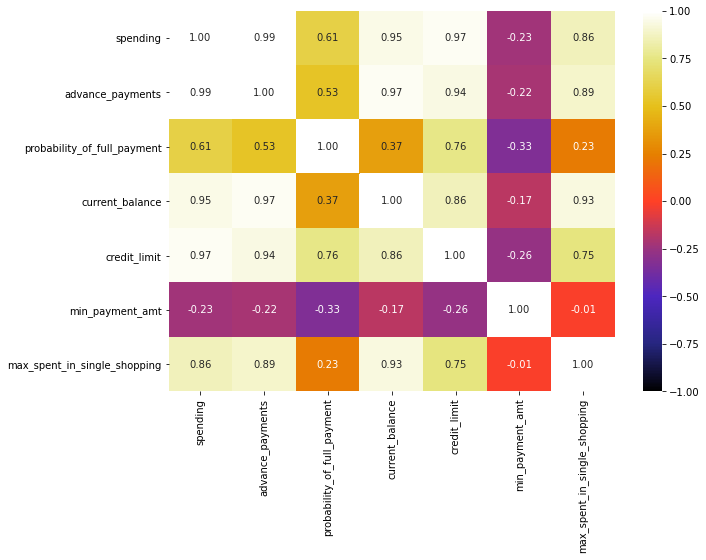

In [15]:
# plot the correlation coefficients as a heatmap
plt.subplots(figsize=(10,7))
sns.heatmap(bank.corr(), annot=True, fmt='.2f', cmap='CMRmap', vmax=1, vmin=-1)
plt.show()

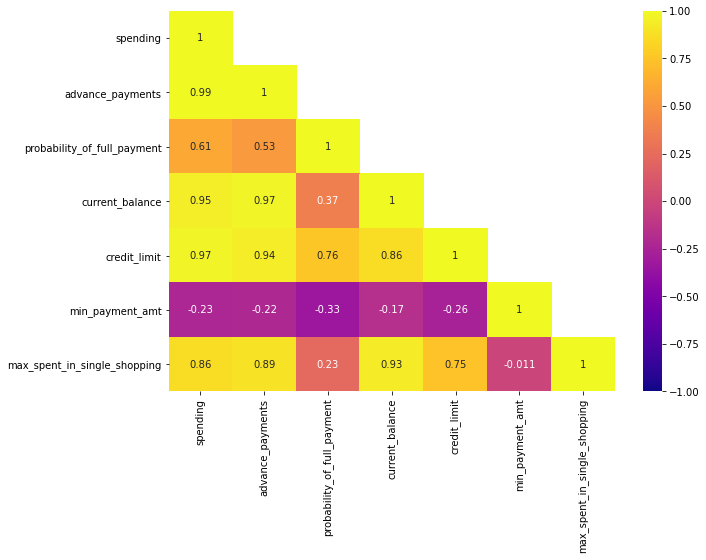

In [16]:
cor=bank.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(10,7))
sns.heatmap(cor, mask = mask, annot = True, cmap='plasma', vmin=-1, vmax=1)

In [17]:
# Scaling the data

In [18]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler()
scaled_bank = X.fit_transform(bank)
scaled_bank

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [19]:
scaled_bank = pd.DataFrame(X.fit_transform(bank), columns=bank.columns)
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [20]:
##Clustering

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
wardlink = linkage(scaled_bank, method = 'ward')

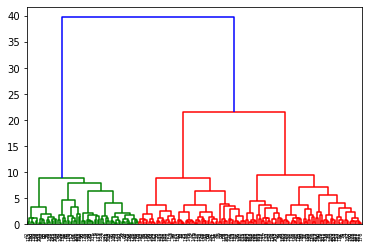

In [23]:
dend = dendrogram(wardlink)

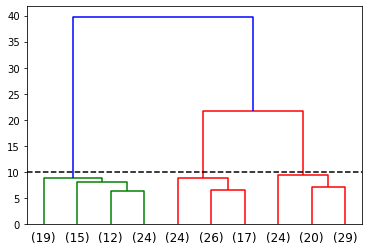

In [24]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

plt.axhline(y=10, color='black',linestyle='--' )

###### We can see 3 clusters from above dendrogram

### Grouping the clusters

In [25]:
from scipy.cluster.hierarchy import fcluster

In [123]:
# Method 1

clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [27]:
# Method 2

clusters = fcluster(wardlink, 25, criterion='distance')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

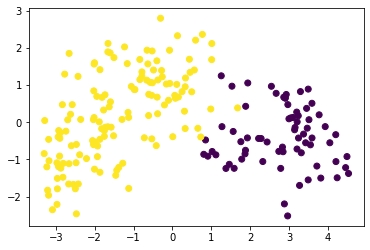

In [100]:
from sklearn.decomposition import PCA

#from sklearn.datasets import load_iris
import pylab as pl
#iris = load_iris()
pca = PCA(n_components=4).fit(scaled_bank)
pca_2d = pca.transform(scaled_bank)
#pl.figure('Reference Plot')
#pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=iris.target)

pl.figure('Hierarchical clustering with 2 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters)
pl.show()

In [28]:
# adding cluster column to dataset

scaled_bank['clusters'] = clusters

In [29]:
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998,1
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582,2
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107,1
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961,2
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813,1


In [30]:
## K Means Clustering

In [31]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
wss =[]

In [61]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2, random_state=1)

In [62]:
# Fit K means on the scaled_df
k_means.fit(scaled_bank)

KMeans(n_clusters=2, random_state=1)

In [63]:
# Get the labels
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [64]:
k_means.inertia_

665.0057893268286

In [65]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_bank)
k_means.inertia_

433.85145245276095

In [66]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_bank)
k_means.inertia_

296.3349390913217

In [67]:
## WSS reduces as K keeps increasing

In [68]:
##Calculating WSS for other values of K - Elbow Method

In [69]:
wss =[] 

In [70]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_bank)
    wss.append(KM.inertia_)

In [71]:
for i in range(1,11):
    print('The WSS value for',i, 'clusters is' ,wss[i-2])

The WSS value for 1 clusters is 207.68751350680498
The WSS value for 2 clusters is 1516.6666666666667
The WSS value for 3 clusters is 665.0057893268286
The WSS value for 4 clusters is 433.85145245276095
The WSS value for 5 clusters is 377.13478979189307
The WSS value for 6 clusters is 333.902763357778
The WSS value for 7 clusters is 296.3349390913217
The WSS value for 8 clusters is 269.5800881871719
The WSS value for 9 clusters is 244.86549935620545
The WSS value for 10 clusters is 226.73525234082194


In [72]:
a=[2,3,4,5,6,7,8,9,10,11]

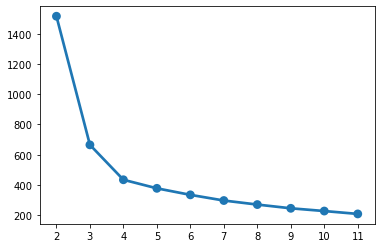

In [73]:
sns.pointplot(a, wss)

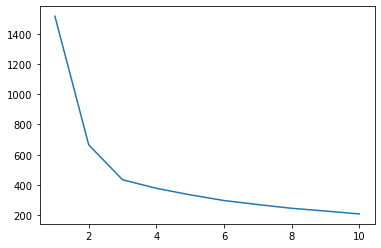

In [74]:
plt.plot(range(1,11), wss)

In [77]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_bank)
labels = k_means.labels_

In [78]:
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [80]:
# Calculating silhouette_score
silhouette_score(scaled_bank,labels,random_state=1)

0.4131148015541322

In [118]:
sil_width = silhouette_samples(scaled_bank, labels)
silhouette_samples(scaled_bank, labels).min()

-0.05774850963307169

In [119]:
bank["Clus_kmeans3"] = labels
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans5,Clus_kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [120]:
bank.Clus_kmeans3.value_counts().sort_index()

0    65
1    70
2    75
Name: Clus_kmeans3, dtype: int64

In [121]:
clust_profile=bank.drop(['Clus_kmeans5'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=bank.Clus_kmeans3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans3,,,,,,,,
0,11.816462,13.242154,0.846060,5.237600,2.834354,4.919415,5.121846,65
1,18.378714,16.152000,0.884039,6.163086,3.684343,3.635871,6.023571,70
2,14.178667,14.214267,0.880441,5.468427,3.228933,2.703589,5.081667,75


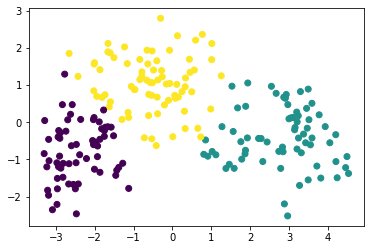

In [122]:
from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from sklearn.datasets import load_iris
import pylab as pl
#iris = load_iris()
pca = PCA(n_components=4).fit(scaled_bank)
pca_2d = pca.transform(scaled_bank)
#pl.figure('Reference Plot')
#pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=iris.target)
#kmeans = KMeans(n_clusters=3, random_state=111)
#kmeans.fit(iris.data)
pl.figure('K-means with 3 clusters')
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=k_means.labels_)
pl.show()